<a href="https://www.kaggle.com/code/victoraesthete/bike-sharing-with-linear-regression-scratch?scriptVersionId=169333995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. EDA and Visualization

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv',parse_dates=[1])

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
import matplotlib.pyplot as plt

### _Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing_

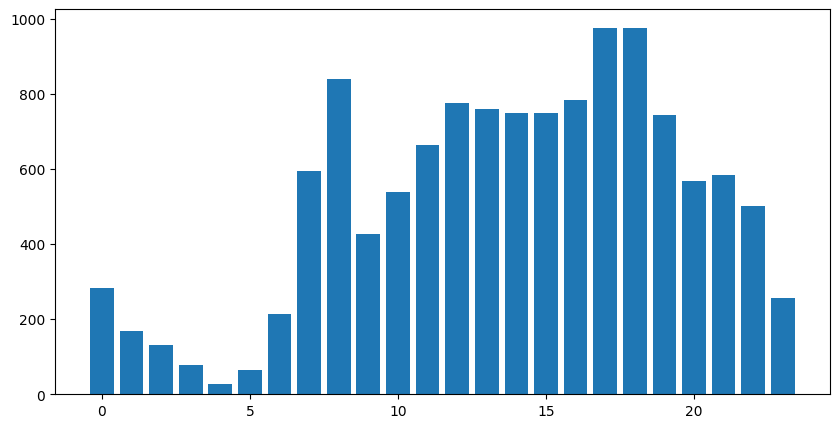

In [5]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['hr'],df['cnt'])
plt.show()

### _Visualize the distribution of count, casual and registered variable_

<Axes: xlabel='casual', ylabel='Density'>

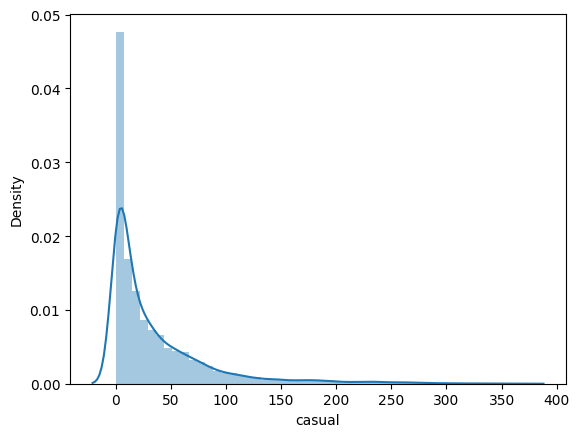

In [6]:
import seaborn as sns
sns.distplot(df['casual'])

<Axes: xlabel='registered', ylabel='Density'>

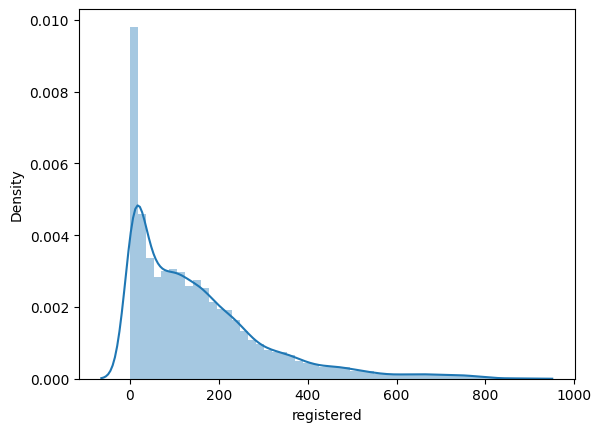

In [7]:
sns.distplot(df['registered'])

<Axes: xlabel='cnt', ylabel='Density'>

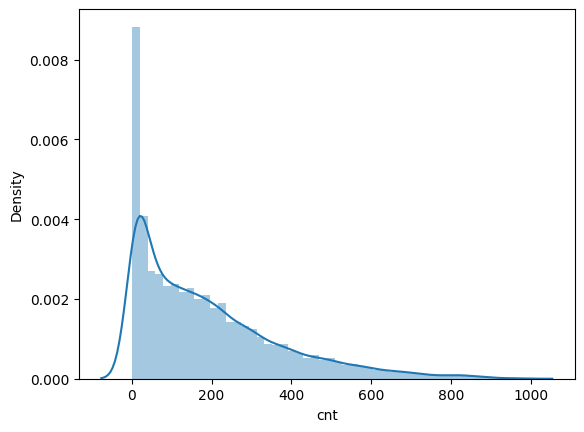

In [8]:
sns.distplot(df['cnt'])

### _Describe the relation of weekday, holiday and working day_

<Axes: >

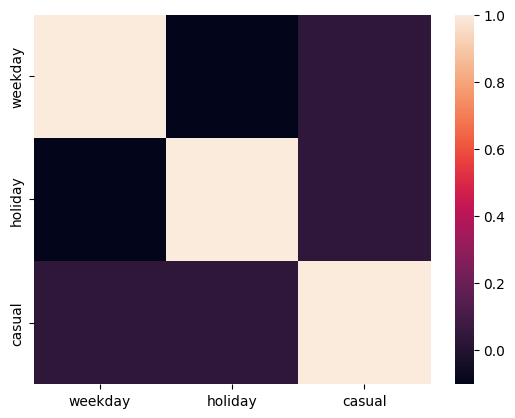

In [9]:
sns.heatmap(df[['weekday','holiday','casual']].corr())

In [10]:
df[['weekday','holiday','casual']].corr()

,weekday,holiday,casual
weekday,1.000000,-0.102088,0.032721
holiday,-0.102088,1.000000,0.031564
casual,0.032721,0.031564,1.000000


### _Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately_

In [11]:
df12=df[(df['dteday']>'2011-12-31') & (df['dteday']<'2013-01-01')]

In [12]:
df12.head()
df12.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


- ####  Year 2011

In [13]:
df11=df[(df['dteday']>'2010-12-31') & (df['dteday']<'2012-01-01')]

In [14]:
months = df11['mnth'].unique()  
casual_counts = df11.groupby('mnth')['casual'].sum()
registered_counts = df11.groupby('mnth')['registered'].sum()

In [15]:
stacked_df = pd.DataFrame({'Casual': casual_counts, 'Registered': registered_counts}, index=months)

<Axes: >

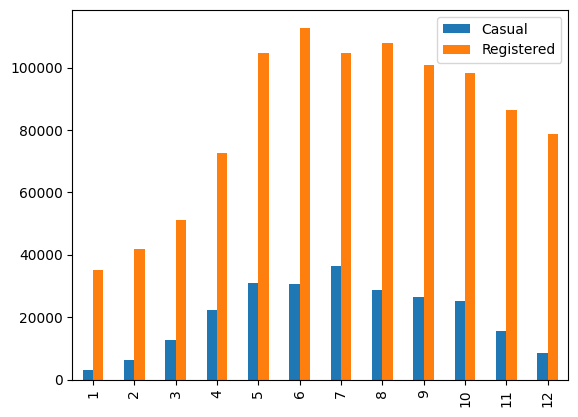

In [16]:
stacked_df.plot(kind='bar')

- #### Year 2012

In [17]:
months = df12['mnth'].unique()  
casual_counts = df12.groupby('mnth')['casual'].sum()
registered_counts = df12.groupby('mnth')['registered'].sum()

In [18]:
stacked_df = pd.DataFrame({'Casual': casual_counts, 'Registered': registered_counts}, index=months)

<Axes: >

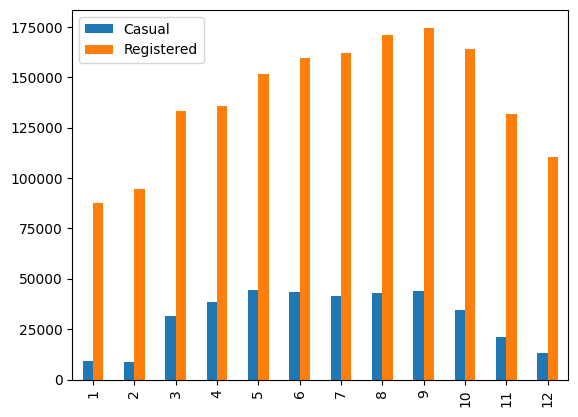

In [19]:
stacked_df.plot(kind='bar')

# 2. Preprocessing

### _Drop unwanted columns_

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
df.duplicated().sum()

0

### _Identify categorical and continuous variables_

In [23]:
sf_cont=df[['temp', 	'atemp', 	'hum', 	'windspeed',   'casual', 	'registered',   'cnt']]

In [24]:
sf_cat=df[['season',    'yr' ,      'mnth', 	'hr',    'holiday' ,	'weekday' ,   	'workingday',  'weathersit']]

In [25]:
sf_cat.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1
2,1,0,1,2,0,6,0,1
3,1,0,1,3,0,6,0,1
4,1,0,1,4,0,6,0,1


### _Feature scaling_

In [26]:
# For Continuous Column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfsc=scaler.fit_transform(sf_cont)
sc=pd.DataFrame(dfsc)
sc.head()

,0,1,2,3,4,5,6
0,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037


### _one-hot encode on the categorical data_

In [27]:
# For Categorical Column
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
cat=enc.fit_transform(sf_cat)
dfcat=pd.DataFrame(cat)
dfcat.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### _Specify features and targets after applying scaling and one-hot encoding_

In [28]:
# Feature
X1=sc.iloc[:,:-1]
y=sc.iloc[:,6:]

X=pd.concat([X1,dfcat],axis=1)

### _Train_Test_Split_

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Linear regression using sklearn

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred=lr.predict(X_test)

In [32]:
y_pred

array([[ 1.29856556],
       [-0.55938778],
       [-1.02249781],
       ...,
       [-0.15692311],
       [ 2.45082742],
       [-0.40501777]])

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

1.0
1.8912192452768367e-30


In [34]:
# plt.plot(y_pred,color='k')
# plt.plot(pd.DataFrame(y_test),color='g')

# 4. Implementation using Normal Equation from Scratch

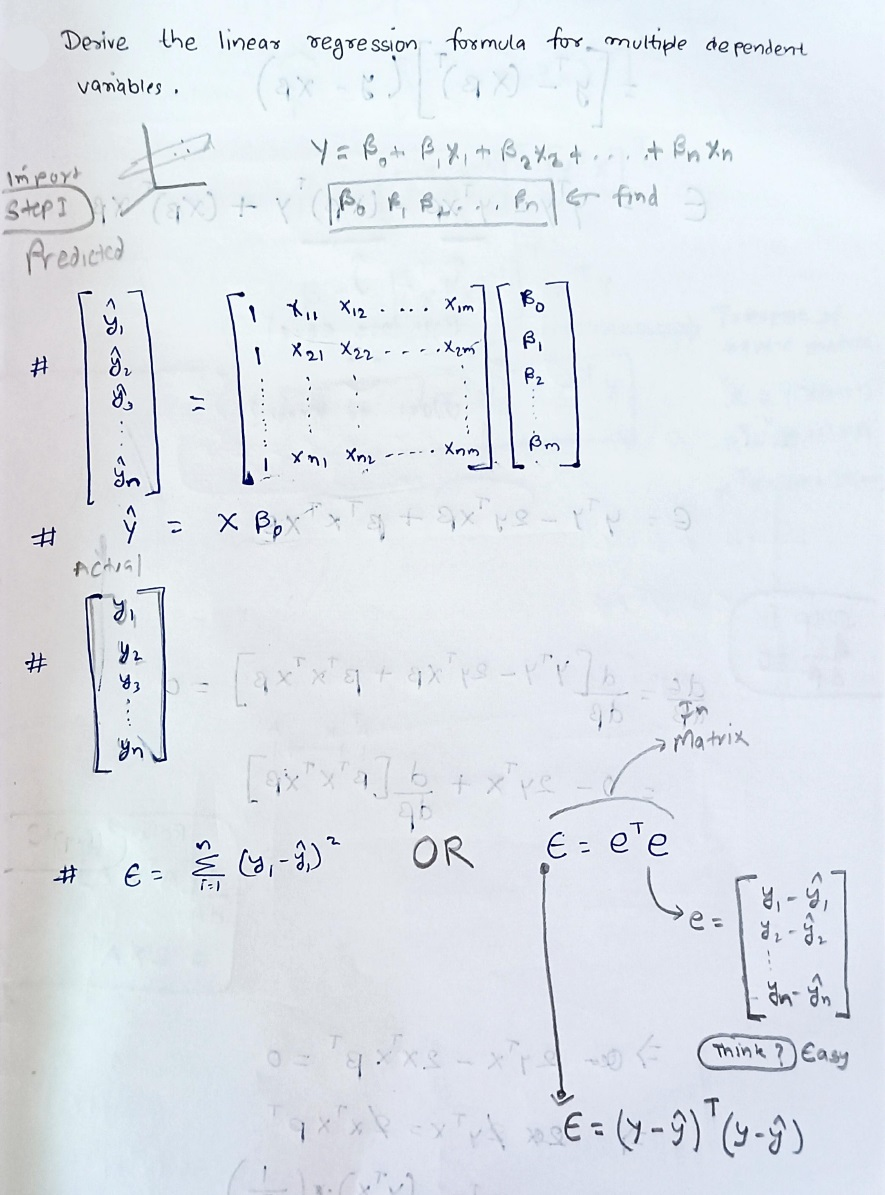

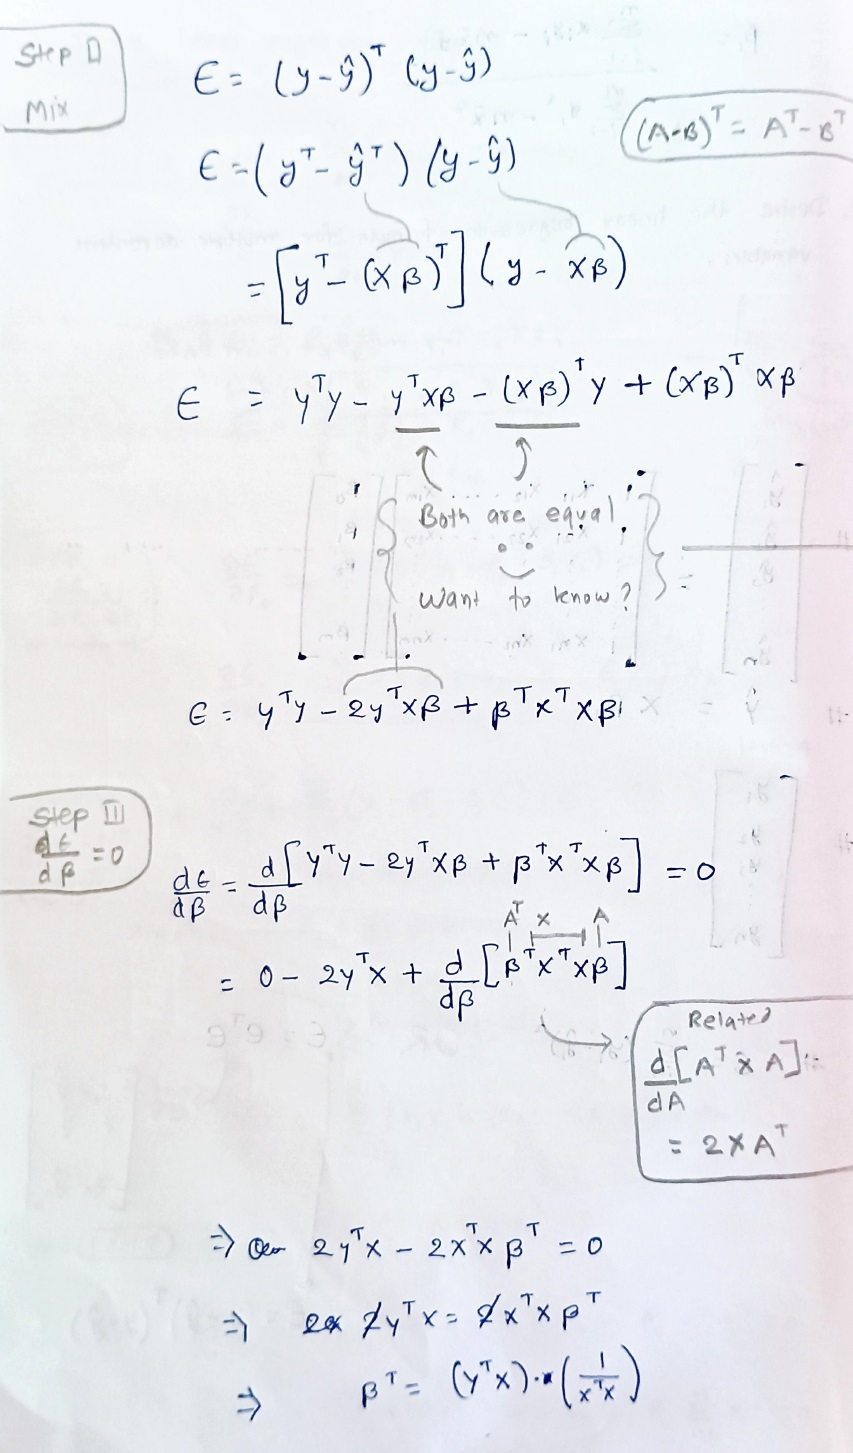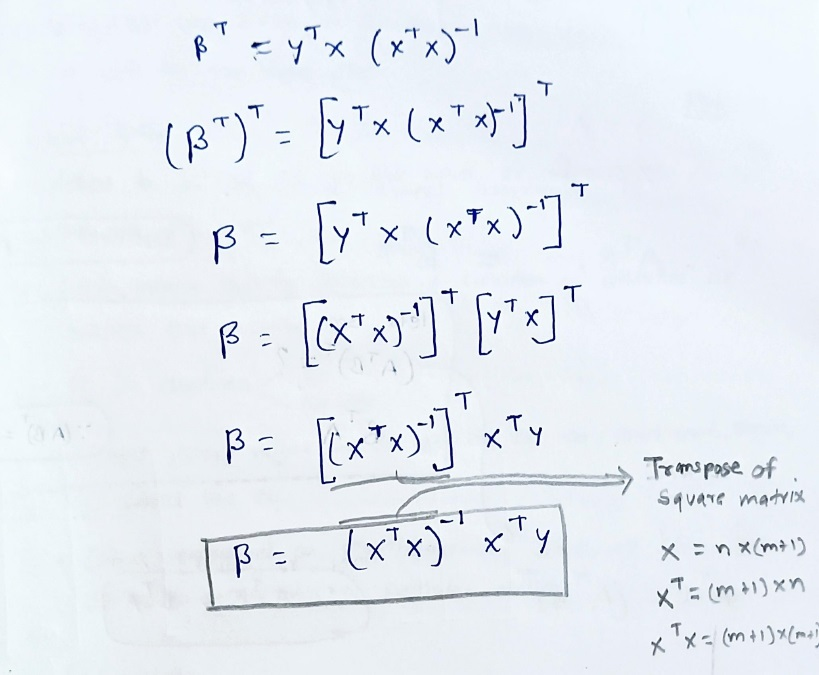

# $ ∴ θ = (X^T X)^{-1} (X^T Y)$

In [35]:
from numpy.linalg import inv

In [36]:
X_train.ndim

2

In [37]:
def coeff_(X,y):
    if 'ones' not in X:
        X.insert(0,'ones',1)
    theta=[]
    theta=inv(X.transpose()@X)@(X.transpose()@y)
    return theta

In [38]:
def predict(X,b):
    if 'ones' not in X:
        X.insert(0,'ones',1)
    return X.values@b.values

In [39]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [40]:
theta=coeff_(X_train,y_train)
y_pred=predict(X_test,theta)

In [41]:
y_pred

array([[ 1.640625],
       [-0.921875],
       [-0.796875],
       ...,
       [-0.734375],
       [ 2.015625],
       [-0.671875]])

In [42]:
print(r2_score(y_test,y_pred))

0.1245745494564976


# 5. Applying Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly=PolynomialFeatures(degree=2)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [45]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(X_test_poly)

In [47]:
y_pred

array([[ 1.29856556],
       [-0.55938778],
       [-1.02249781],
       ...,
       [-0.15692311],
       [ 2.45082742],
       [-0.40501777]])

In [48]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.999999555710776
4.308102352697257e-07


# 6. Applying Lasso, Ridge and ElasticNet Regression

In [49]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
lasso=Lasso()
ridge=Ridge()
enet=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [50]:
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [51]:
y_pred_lasso=lasso.predict(X_test)
y_pred_ridge=ridge.predict(X_test)
y_pred_enet=enet.predict(X_test)

In [52]:
print(r2_score(y_test,y_pred_lasso))
print(r2_score(y_test,y_pred_ridge))
print(r2_score(y_test,y_pred_enet))

-0.0008869657227947858
0.9999999839628703
0.9920512956223837


# 7. Cross Validation Score

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cross_val_score(lr,X_train_poly,y_train,cv=5)

array([1.        , 0.99999808, 1.        , 1.        , 1.        ])

In [55]:
cross_val_score(lasso,X_train,y_train,cv=5)

array([-0.00012767,  0.00559994, -0.00082845, -0.00108787, -0.00092221])

In [56]:
cross_val_score(ridge,X_train_poly,y_train,cv=5)

array([0.99999991, 0.99999807, 0.99999996, 0.99999993, 0.99999995])

In [57]:
cross_val_score(enet,X_train_poly,y_train,cv=5)

array([0.99242585, 0.99317456, 0.99349581, 0.99337552, 0.99325205])